In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/'EDA of  Machine Predictive Maintenance Classification Dataset'
%ls

Mounted at /content/drive
/content/drive/MyDrive/EDA of  Machine Predictive Maintenance Classification Dataset
 ai4i2020.csv  'EDA of Machine Predictive Maintenance Classification Dataset.ipynb'


**Loading DataSet**

In [3]:
import pandas as pd
df = pd.read_csv("ai4i2020.csv")

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


**Checking Dataset Size: The number of rows and columns in the dataset.**

In [ ]:
print(f"Dataset Size: {df.shape}")

Dataset Size: (10000, 14)


**Checking Column Types: Information about columns and their data types.**

In [ ]:
df.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Machine failure,int64
TWF,int64


**Basic Summary Statistics**

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
UDI,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Rotational speed [rpm],10000.000000,1538.776100,179.284096,1168.000000,1423.000000,1503.000000,1612.000000,2886.000000
Tool wear [min],10000.000000,107.951000,63.654147,0.000000,53.000000,108.000000,162.000000,253.000000
Torque [Nm],10000.000000,39.986910,9.968934,3.800000,33.200000,40.100000,46.800000,76.600000
Air temperature [K],10000.000000,300.004930,2.000259,295.300000,298.300000,300.100000,301.500000,304.500000
Process temperature [K],10000.000000,310.005560,1.483734,305.700000,308.800000,310.100000,311.100000,313.800000
Machine failure,10000.000000,0.033900,0.180981,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,10000.000000,0.011500,0.106625,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,10000.000000,0.009800,0.098514,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,10000.000000,0.009500,0.097009,0.000000,0.000000,0.000000,0.000000,1.000000


**Unique Values: Number of unique values for each column.**

In [ ]:
df.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Machine failure,2
TWF,2


**Data Types and Memory Usage: Detailed information about the DataFrame.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

**Selecting numerical columns**

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_columns)


Numerical Columns: ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


**Selecting categorical columns**

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Product ID', 'Type']


**Handling Missing Values**

In [ ]:
df.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Checking for missing values in each column**

In [ ]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


**Visualizing missing values using a heatmap**

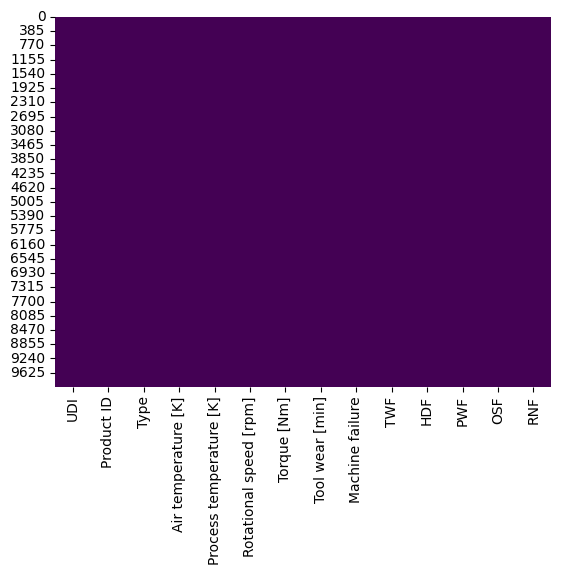

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

**Detecting outliers using Box plots**

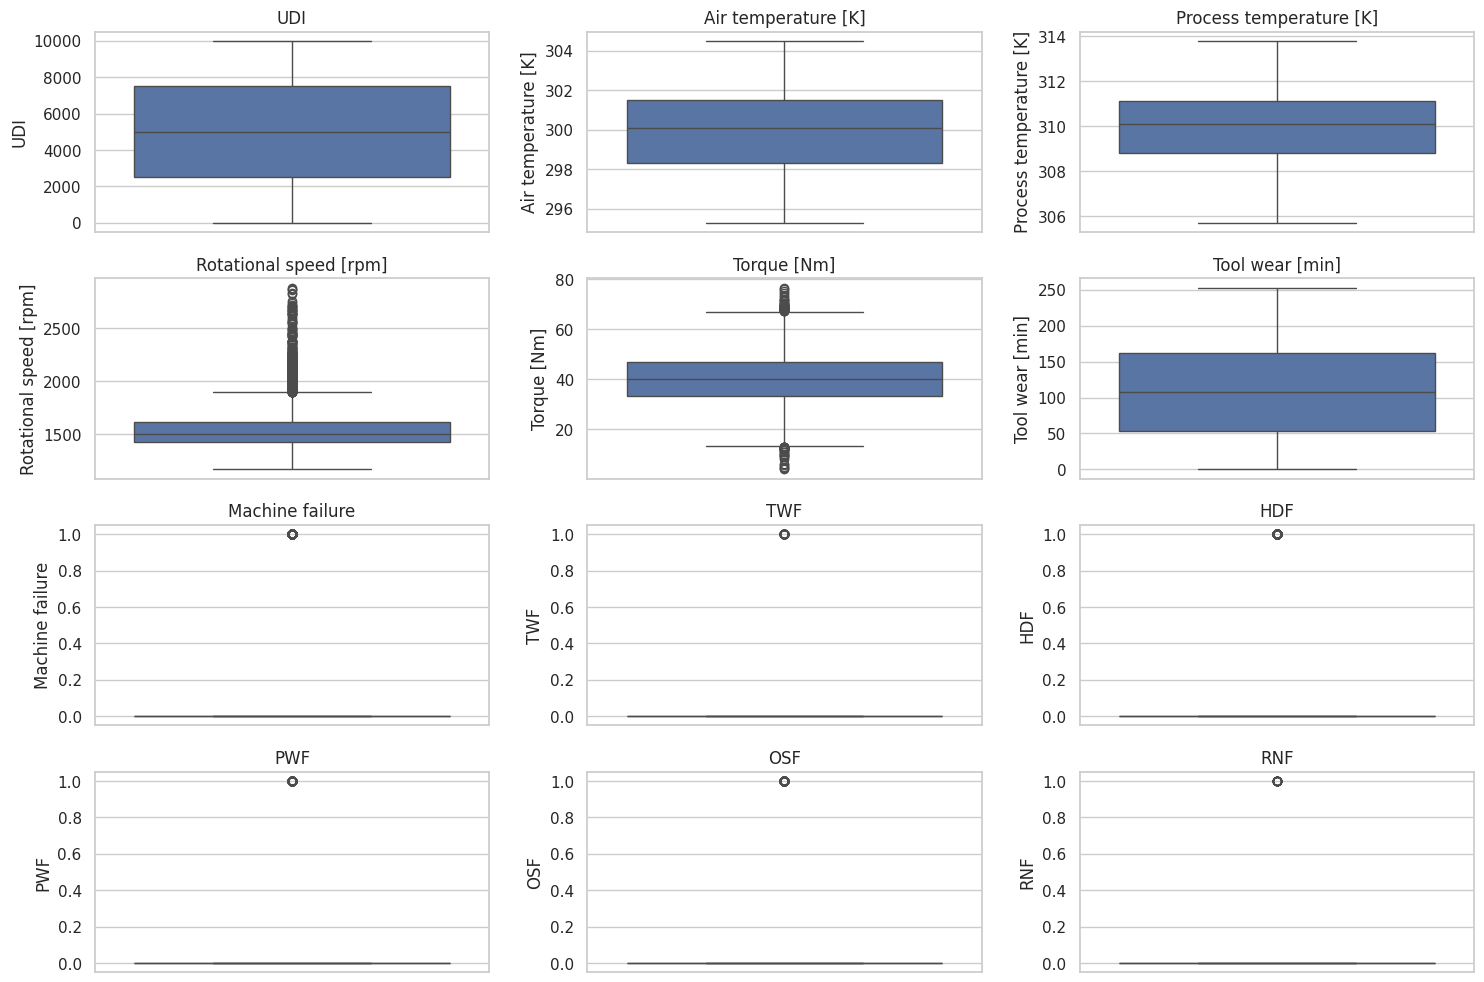

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style='whitegrid')

# Creating box plots for numerical columns to detect outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()

# Displaying the plots
plt.show()

**Creating histograms for numerical columns to analyze their distributions**

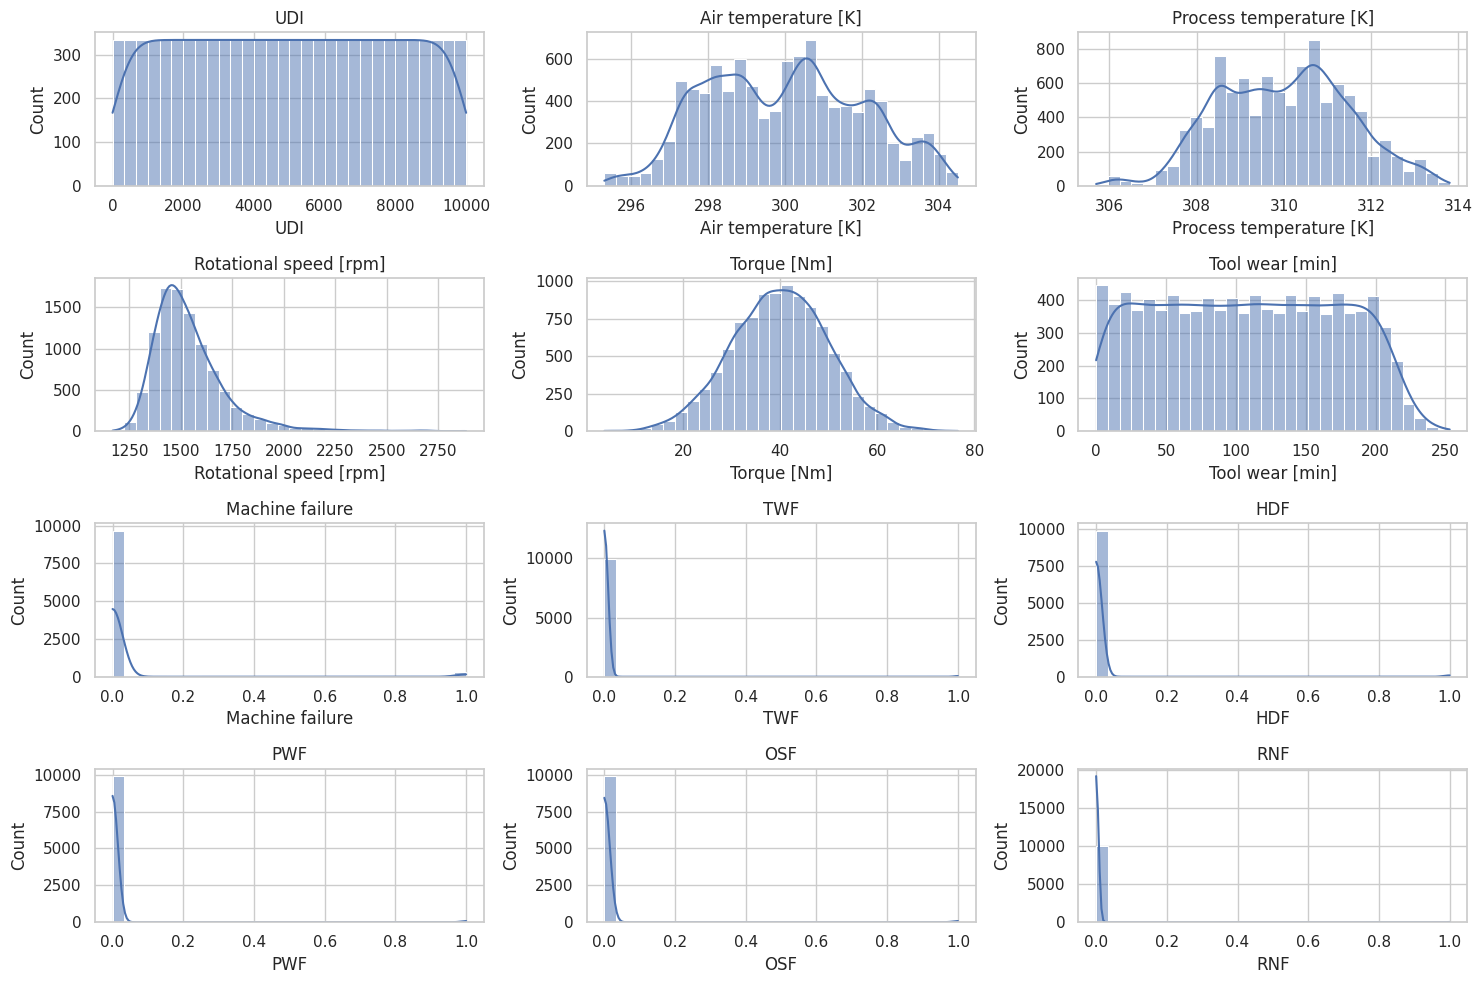

In [ ]:

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()

# Displaying the plots
plt.show()

**Creating scatter plots for bivariate analysis**

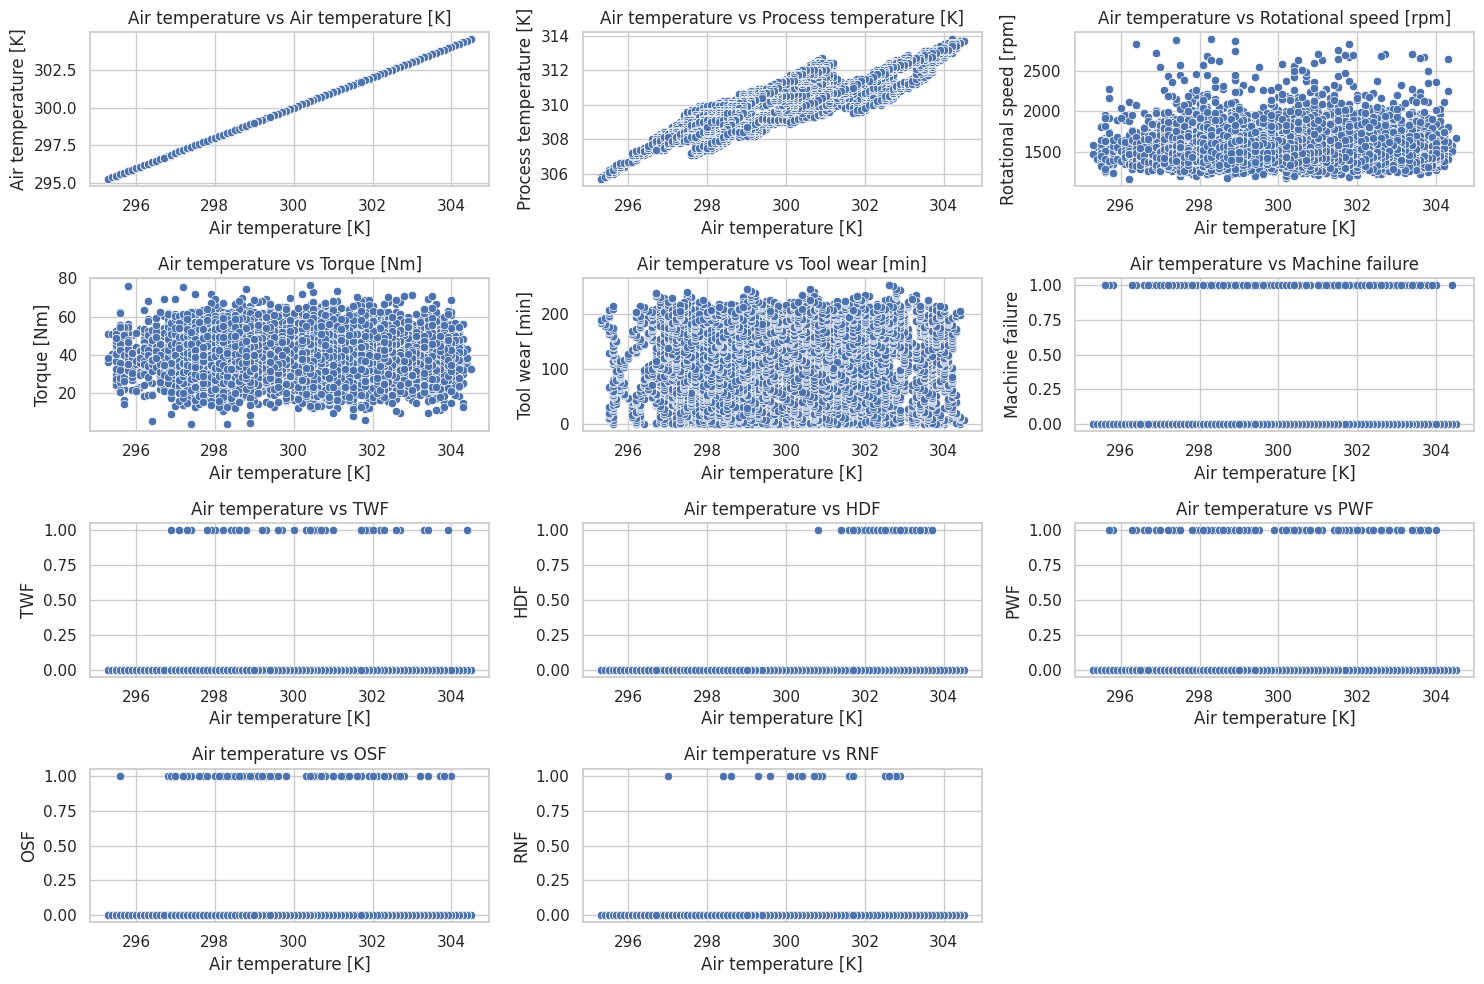

In [ ]:

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns[1:], 1):  # Excluding 'UDI' for scatter plots
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df['Air temperature [K]'], y=df[column])
    plt.title('Air temperature vs ' + column)
plt.tight_layout()

# Displaying the plots
plt.show()

**Setting up the heatmap for the correlation matrix**

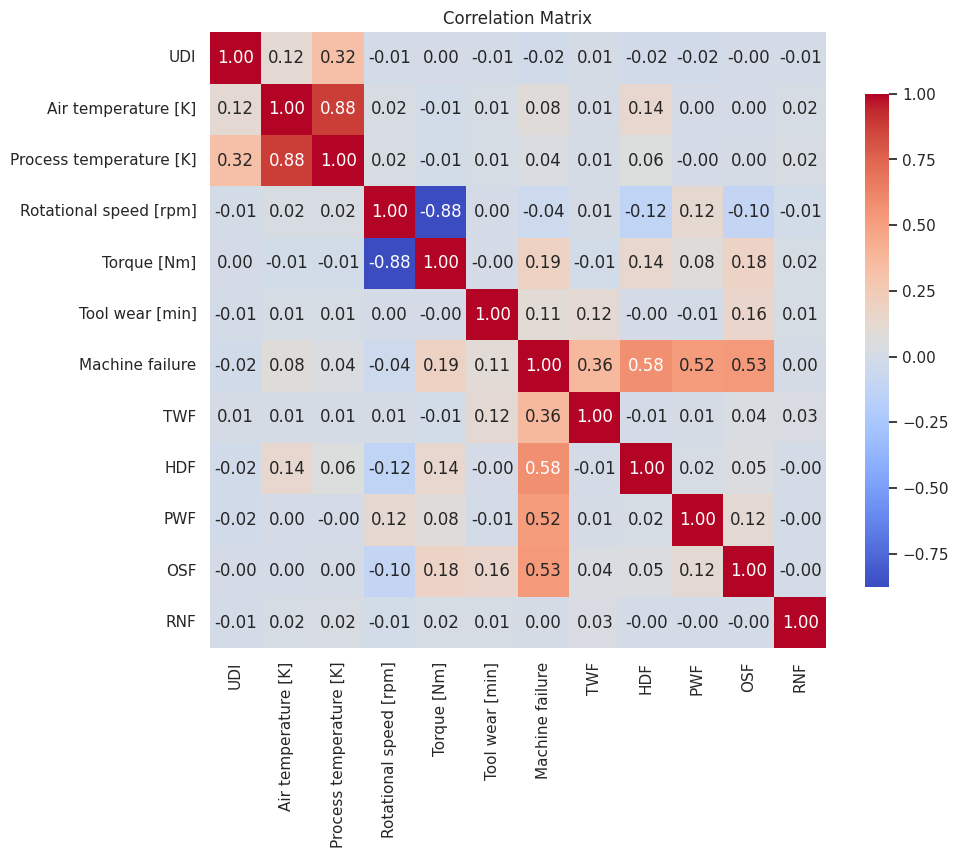

In [ ]:
correlation_matrix = df[numerical_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')

# Displaying the heatmap
plt.show()

From this matrix, we can observe the following key correlations:

    Air Temperature and Process Temperature: A strong positive correlation (approximately 0.88), indicating that as air temperature increases, process temperature tends to increase as well.
    Tool Wear and Machine Failure: A weak positive correlation (approximately 0.11), suggesting a slight tendency for machine failure to increase with tool wear.
    Torque and Machine Failure: A moderate positive correlation (approximately 0.19), indicating that higher torque may be associated with an increased likelihood of machine failure.


**Identifying Patterns and Trends**

In [7]:
# Calculating average values of key metrics across different product types
average_metrics = df.groupby('Type').agg({
    'Air temperature [K]': 'mean',
    'Process temperature [K]': 'mean',
    'Rotational speed [rpm]': 'mean',
    'Torque [Nm]': 'mean',
    'Tool wear [min]': 'mean',
    'Machine failure': 'mean'
}).reset_index()

# Printing the average metrics across product types
print(average_metrics)

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    H           299.866999               309.925723             1538.147557   
1    L           300.015833               310.012300             1539.469167   
2    M           300.029263               310.018785             1537.598932   

   Torque [Nm]  Tool wear [min]  Machine failure  
0    39.838285       107.419741         0.020937  
1    39.996600       108.378833         0.039167  
2    40.017251       107.272272         0.027694  


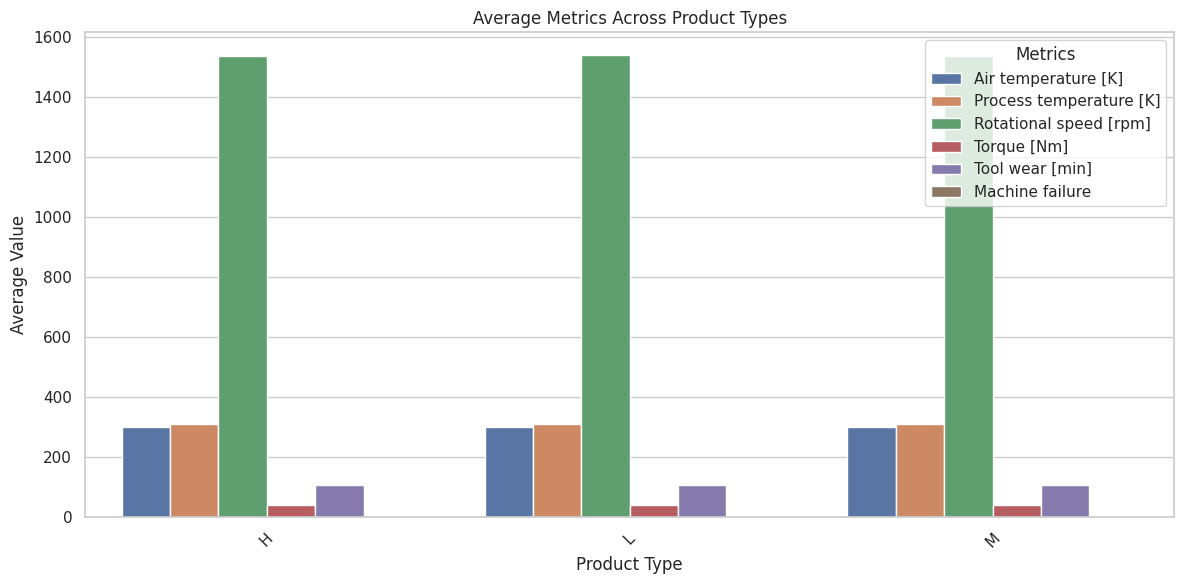

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Melting the average metrics dataframe for easier plotting
melted_metrics = average_metrics.melt(id_vars='Type', var_name='Metric', value_name='Average Value')

# Creating a bar plot to visualize average metrics across product types
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_metrics, x='Type', y='Average Value', hue='Metric')
plt.title('Average Metrics Across Product Types')
plt.xlabel('Product Type')
plt.ylabel('Average Value')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot visualizes the average metrics by product type, highlighting how different metrics vary across the types "H", "L", and "M".

Key findings from the plot include:

    Air Temperature: The average air temperature is relatively consistent across product types, with slight variations.
    Process Temperature: Similar to air temperature, the process temperature shows minor differences among the types.
    Rotational Speed: There are noticeable differences in average rotational speed, with type "M" having the highest average.
    Torque: The torque values also vary, with type "H" showing a higher average compared to the others.
    Tool Wear: The average tool wear is lowest for type "H", indicating potentially better performance or less wear in that category.

The plot provides a clear comparison of these metrics, allowing for insights into the performance characteristics of each product type.

**Hypothesis Testing**

In [ ]:
# Checking the unique product types and their average process temperatures
unique_product_types = df['Type'].unique()
average_process_temp = df.groupby('Type')['Process temperature [K]'].mean().reset_index()

# Printing the results
print('Unique Product Types:', unique_product_types)
print(average_process_temp)

In [5]:
# Performing one-way ANOVA test for process temperature across different product types
from scipy import stats
anova_result = stats.f_oneway(
    df[df['Type'] == 'M']['Process temperature [K]'],
    df[df['Type'] == 'L']['Process temperature [K]'],
    df[df['Type'] == 'H']['Process temperature [K]']
)

# Extracting the F-statistic and p-value
f_statistic = anova_result.statistic
p_value_anova = anova_result.pvalue

# Printing the results
print('F-statistic:', f_statistic)
print('P-value:', p_value_anova)

F-statistic: 1.6331800189681098
P-value: 0.19535960913997494


In [6]:
# Calculating the correlation coefficient between tool wear and machine failure
correlation_tool_wear_failure = df['Tool wear [min]'].corr(df['Machine failure'])

# Performing a Pearson correlation test
corr_test_stat, p_value_corr = stats.pearsonr(df['Tool wear [min]'], df['Machine failure'])

# Printing the results
print('Correlation Coefficient:', correlation_tool_wear_failure)
print('Correlation Test Statistic:', corr_test_stat)
print('P-value:', p_value_corr)

Correlation Coefficient: 0.10544821891959534
Correlation Test Statistic: 0.10544821891959547
P-value: 3.976075962868855e-26


**Displaying the summary findings**

In [ ]:
summary_findings = {
    'Dataset Size': df.shape,
    'Numerical Columns': numerical_columns.tolist(),
    'Missing Values': df.isnull().sum().to_dict(),
    'Correlation with Air Temperature': correlation_matrix['Air temperature [K]'].to_dict(),
    'Outliers Detected': 'Yes'  # Based on box plots
}


summary_findings

{'Dataset Size': (10000, 14),
 'Numerical Columns': ['UDI',
  'Air temperature [K]',
  'Process temperature [K]',
  'Rotational speed [rpm]',
  'Torque [Nm]',
  'Tool wear [min]',
  'Machine failure',
  'TWF',
  'HDF',
  'PWF',
  'OSF',
  'RNF'],
 'Missing Values': {'UDI': 0,
  'Product ID': 0,
  'Type': 0,
  'Air temperature [K]': 0,
  'Process temperature [K]': 0,
  'Rotational speed [rpm]': 0,
  'Torque [Nm]': 0,
  'Tool wear [min]': 0,
  'Machine failure': 0,
  'TWF': 0,
  'HDF': 0,
  'PWF': 0,
  'OSF': 0,
  'RNF': 0},
 'Correlation with Air Temperature': {'UDI': 0.11742794602012077,
  'Air temperature [K]': 1.0,
  'Process temperature [K]': 0.8761071581166637,
  'Rotational speed [rpm]': 0.022670458795535774,
  'Torque [Nm]': -0.013777823050932982,
  'Tool wear [min]': 0.013852827663160141,
  'Machine failure': 0.08255568978322685,
  'TWF': 0.009954723891485634,
  'HDF': 0.1378309392396398,
  'PWF': 0.003469509144179697,
  'OSF': 0.001987920908400875,
  'RNF': 0.017687681906713427

There are no missing values in the dataset, as indicated by the count of missing values for each column, which is zero.There are three unique product types in the dataset: 'M', 'L', and 'H', with their corresponding average process temperatures shown in the table above. Since we have more than two groups, a one-way ANOVA test is more appropriate for comparing the means of process temperatures across these product types.The one-way ANOVA test results indicate an F-statistic of approximately 1.63 and a p-value of approximately 0.195. Since the p-value is greater than the common significance level of 0.05, we fail to reject the null hypothesis, suggesting that there is no significant difference in the average process temperatures among the product types 'M', 'L', and 'H'.The analysis for Hypothesis 2 indicates a correlation coefficient of approximately 0.105, suggesting a weak positive correlation between tool wear and machine failure. The p-value is extremely low (approximately 3.98×10−263.98×10−26), indicating that this correlation is statistically significant.

In summary:

    For Hypothesis 1, we found no significant difference in average process temperatures among product types.
    For Hypothesis 2, there is a statistically significant weak positive correlation between tool wear and machine failure.


